In [1]:
!pip install diagrams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 35.8 MB/s eta 0:00:00


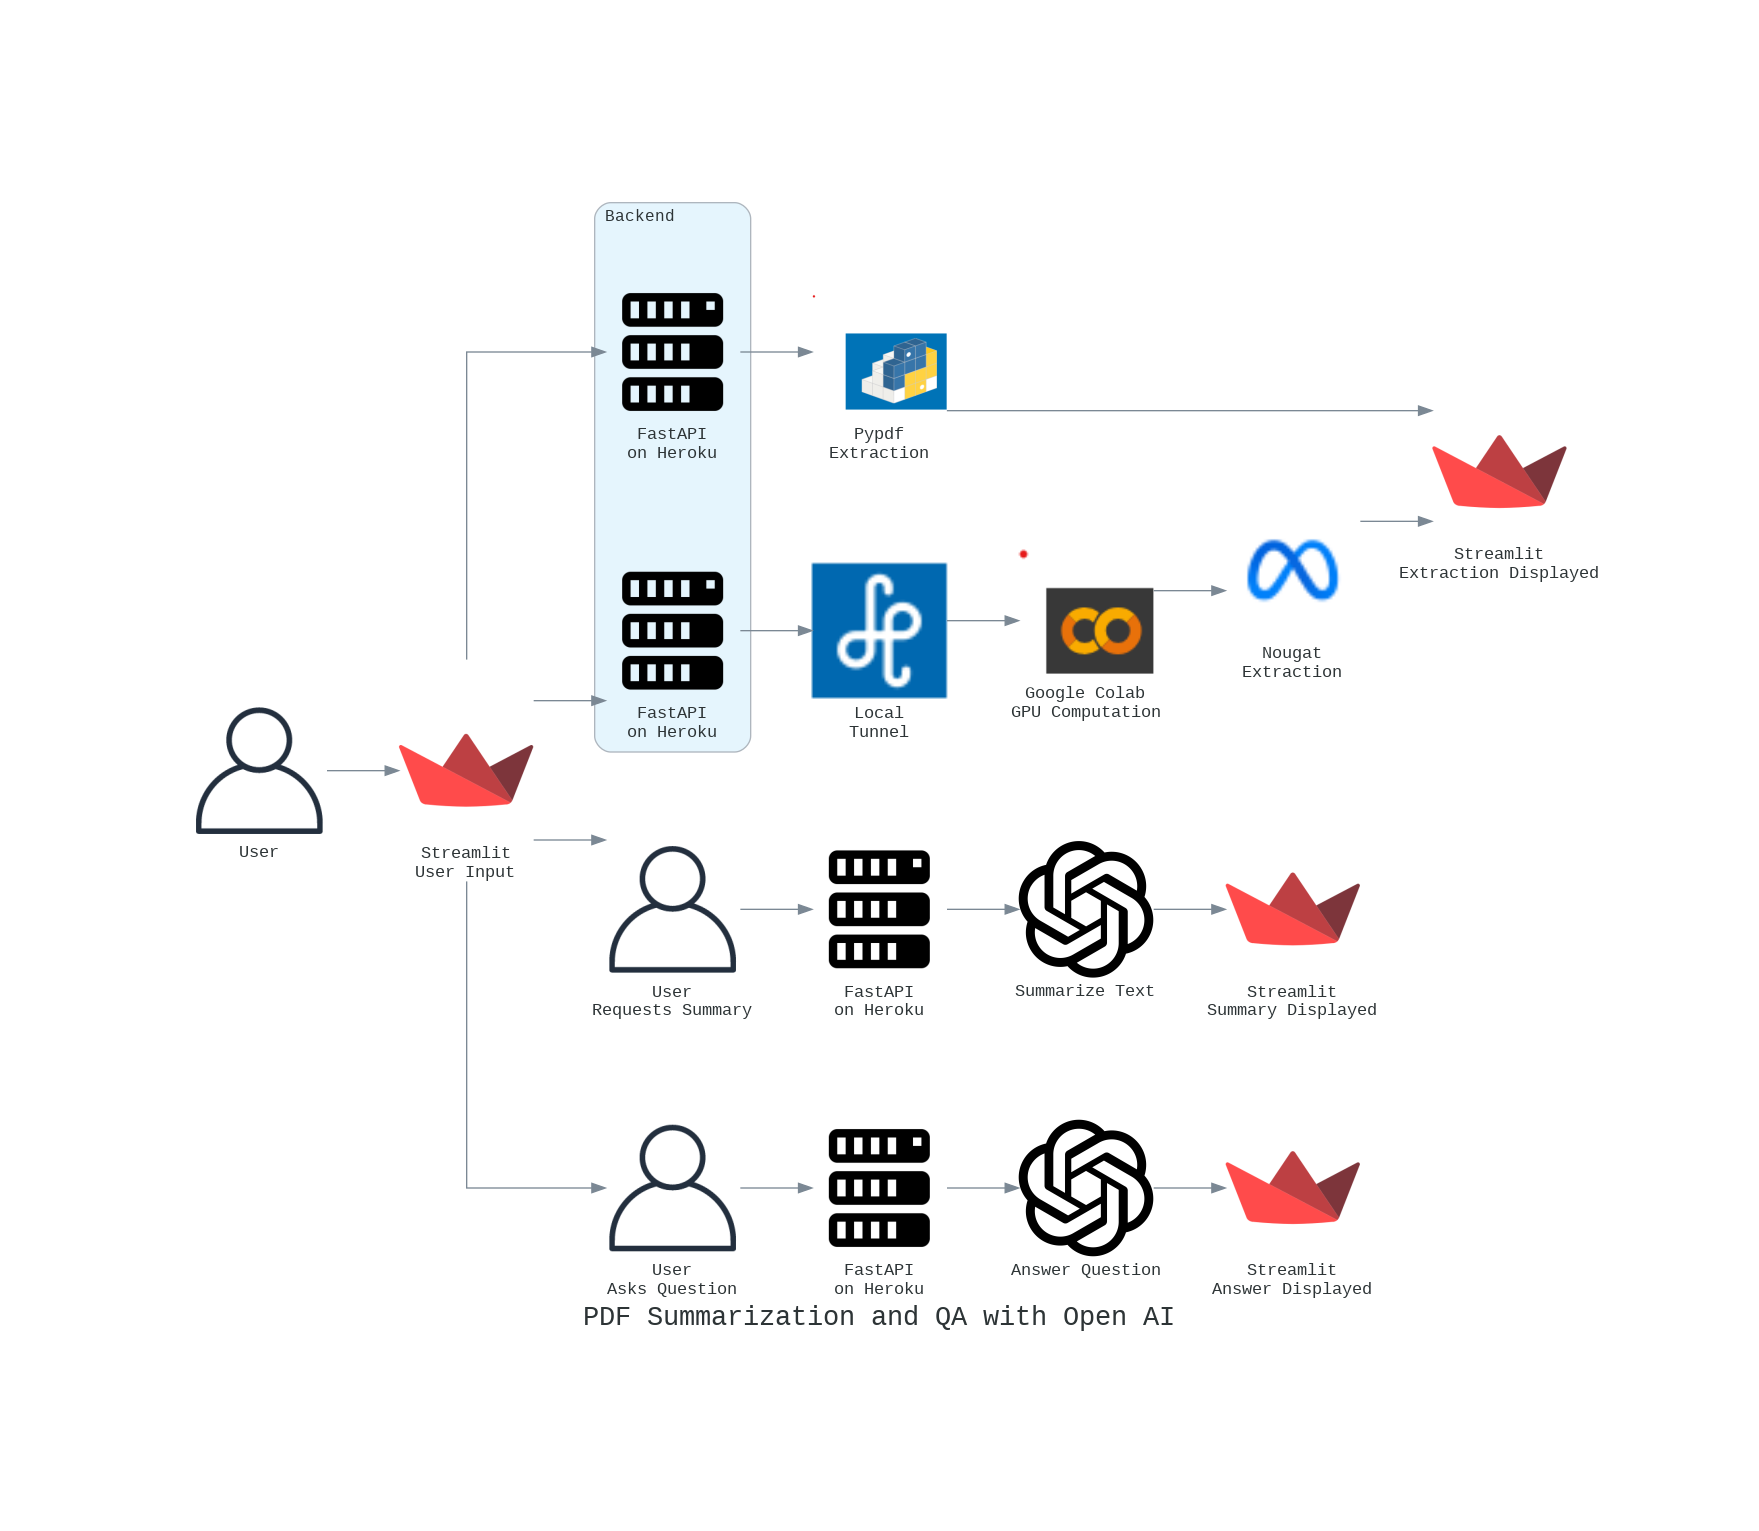

In [18]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.client import User
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.programming.language import Python
from diagrams.programming.framework import FastAPI
from diagrams.custom import Custom

graph_attr = {
    "fontsize": "20",
    "bgcolor": "transparent"
}

with Diagram("PDF Summarization and QA with Open AI", show=False, direction="LR", graph_attr=graph_attr) as diag:
    user = User("User")
    user_in_streamlit = Custom("Streamlit\nUser Input", "/content/streamlit logo.png")
    extr_in_streamlit = Custom("Streamlit\nExtraction Displayed", "/content/streamlit logo.png")
    summary_streamlit = Custom("Streamlit\nSummary Displayed", "/content/streamlit logo.png")
    qa_in_streamlit = Custom("Streamlit\nAnswer Displayed", "/content/streamlit logo.png")
    colab = Custom("Google Colab\nGPU Computation", "/content/colab_logo.png")
    nougat = Custom("Nougat\nExtraction", "/content/nougat_logo.png")
    pypdf = Custom("Pypdf\nExtraction", "/content/pypdf.png")
    localtunnel = Custom("Local\nTunnel", "/content/localtunnel.png")
    user >> user_in_streamlit
    OpenAI_sum = Custom("Summarize Text", "/content/openai-icon-2021x2048-4rpe5x7n.png")
    OpenAI_qa = Custom("Answer Question", "/content/openai-icon-2021x2048-4rpe5x7n.png")

    with Cluster("Backend"):
        user_in_streamlit >> Server("FastAPI\non Heroku") >> pypdf >> extr_in_streamlit
        user_in_streamlit >> Server("FastAPI\non Heroku") >> localtunnel >> colab >> nougat >> extr_in_streamlit

    user_summary_request = User("User\nRequests Summary")
    user_in_streamlit >> user_summary_request
    user_summary_request >> Server("FastAPI\non Heroku") >> OpenAI_sum >> summary_streamlit

    user_question_request = User("User\nAsks Question")
    user_in_streamlit >> user_question_request
    user_question_request >> Server("FastAPI\non Heroku") >> OpenAI_qa >> qa_in_streamlit
diag